In [1]:
import pandas as pd 


# Carico il dataset
df = pd.read_csv("Dataset\Student_performance_data _.csv")

df.head()

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
C:\Users\lucab\AppData\Local\Temp\ipykernel_21656\2320224687.py:5: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("Dataset\Student_performance_data _.csv")


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [2]:
df = df.drop(columns=["StudentID"])
df = df.drop(columns=["GradeClass"])
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


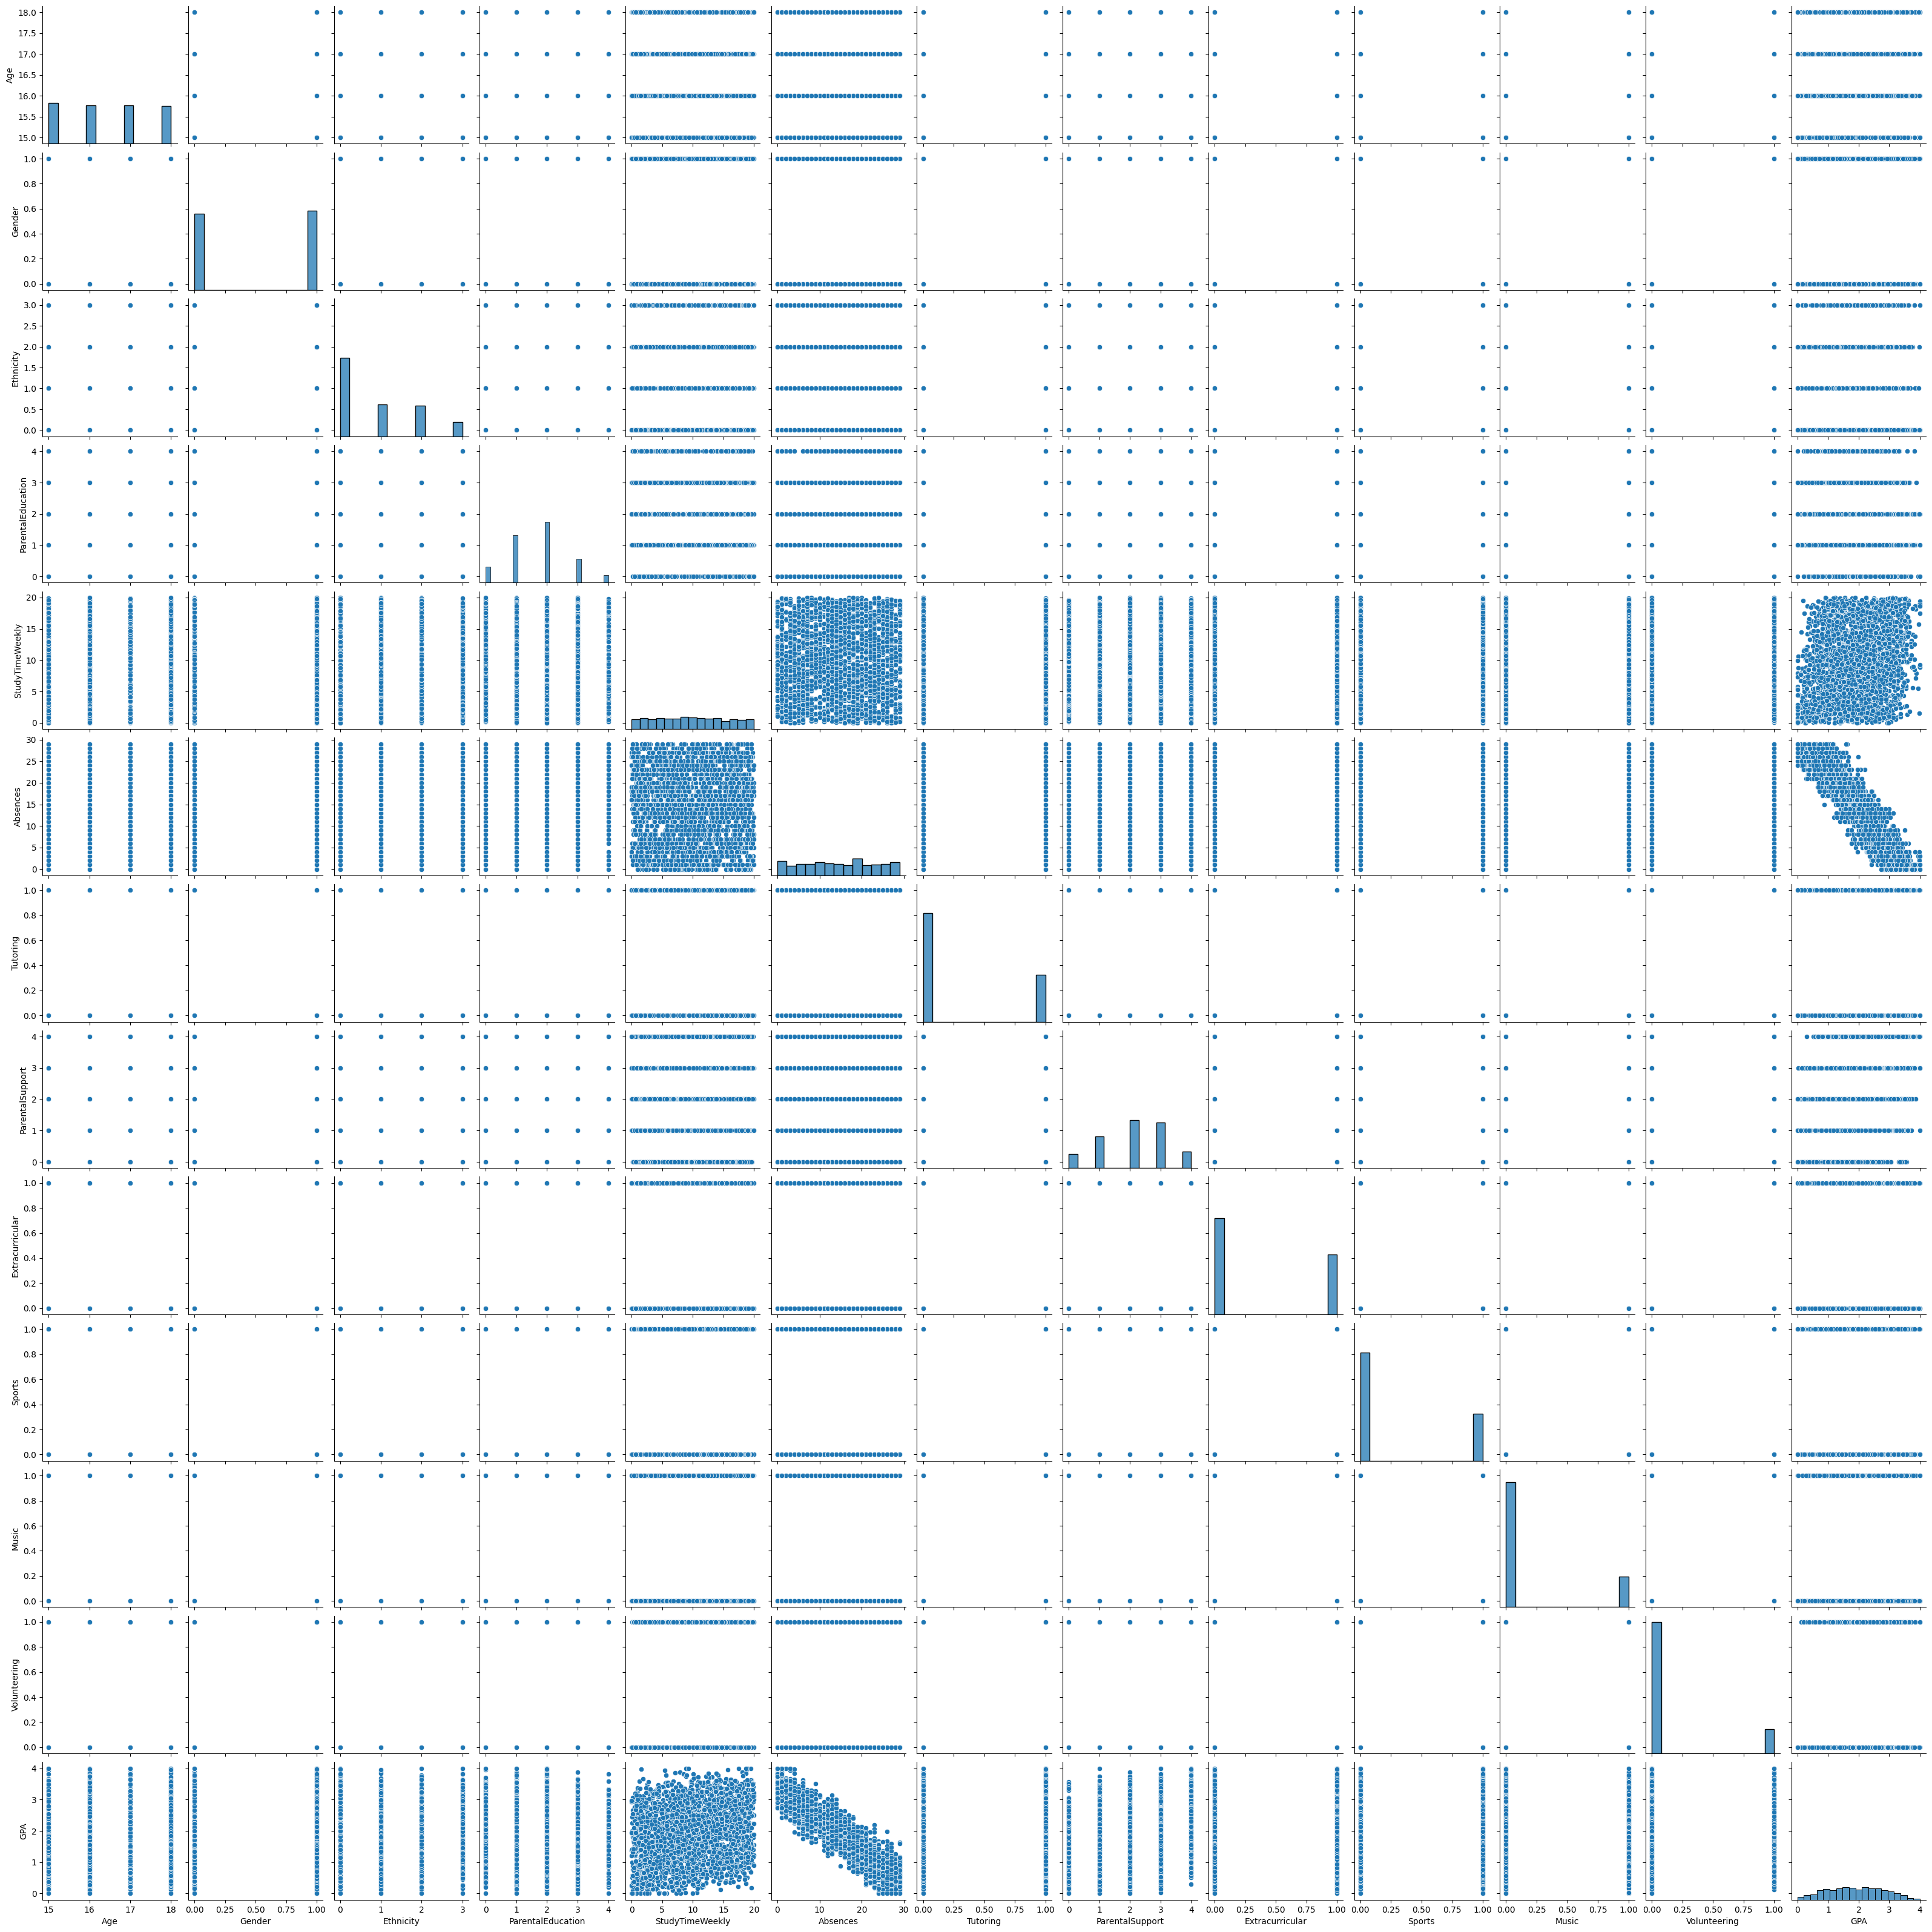

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crea la matrice di grafici di dispersione
sns.pairplot(df)

# Mostra il grafico
plt.show()

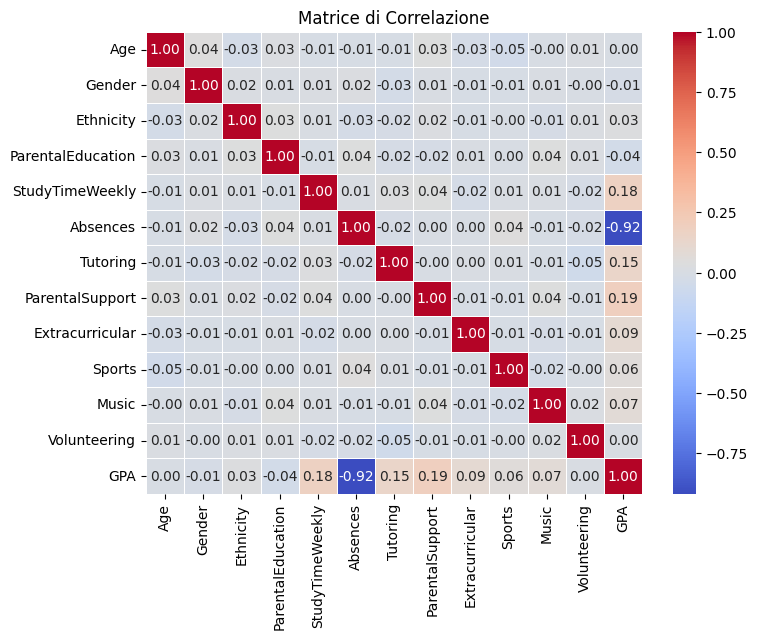

In [4]:
# Calcolare la matrice di correlazione
correlation_matrix = df.corr()

# Creare la heatmap
plt.figure(figsize=(8, 6))  # Impostare la dimensione della figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Mostrare la heatmap
plt.title("Matrice di Correlazione")
plt.show()

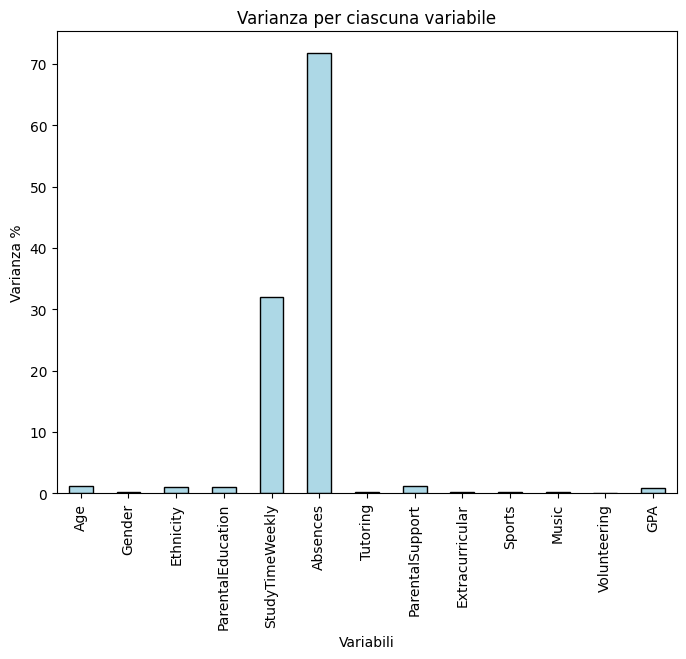

In [6]:
# Calcolare la varianza per ogni colonna numerica
varianze = df.var()

# Visualizzare la varianza come un grafico a barre
plt.figure(figsize=(8, 6))
varianze.plot(kind='bar', color='lightblue', edgecolor='black')

# Aggiungere etichette e titolo
plt.xlabel('Variabili')
plt.ylabel('Varianza %')
plt.title('Varianza per ciascuna variabile')

# Mostrare il grafico
plt.show()

Numero di componenti necessarie per mantenere almeno il 70% della varianza: 8


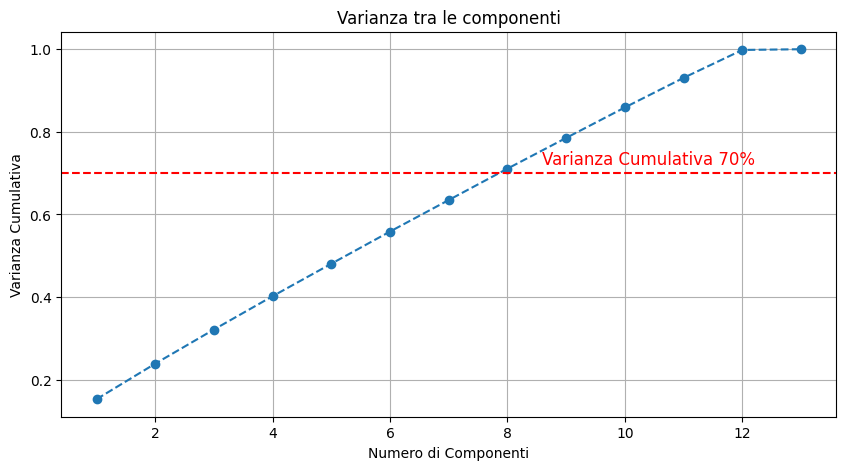

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. Standardizzazione dei dati
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 2. Applicare PCA
pca = PCA()
pca.fit(df_scaled)

# 3. Calcolare la varianza spiegata cumulativa
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# 4. Trovare il numero minimo di componenti per ottenere almeno il 70% della varianza
num_components = np.argmax(cumulative_variance >= 0.7) + 1

# 5. Stampare il risultato
print(f"Numero di componenti necessarie per mantenere almeno il 70% della varianza: {num_components}")

# 6. Visualizzazione grafica della varianza cumulativa
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.7, color='r', linestyle='--')
plt.xlabel('Numero di Componenti')
plt.ylabel('Varianza Cumulativa')
plt.title('Varianza tra le componenti')

# Aggiungere il testo sulla linea rossa tratteggiata (per 70% di varianza)
plt.text(len(cumulative_variance) * 0.8, 0.72, 'Varianza Cumulativa 70%', color='r', fontsize=12, ha='center')

plt.grid(True)
plt.show()
